<h1><center><u>Car Price Prediction</u></center></h1>

<font size='3.5'>The problem that I am going to solve in this project is that given a set of features that describes a car of different brands, and the machine lerning model will predict the car price based on their features.</font>

<font size='3.5'>**Business Case:** Build regression models to predict car price based on various features given</font>

<font size='3.5'>  </font>

<font size='3.5'>  </font>

<font size='4'><b>1.Importing libraries and dataset</b></font>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
ds = pd.read_csv('CarPrice.csv')

In [17]:
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',100)

In [18]:
ds.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [19]:
#data types of each of the columns are showm below
ds.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [20]:
#Mean, variance, standard deviation, quantiles of the columns of datasets are described here
ds.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,205.000000,205.000000,205.000000,205.000000,205,205,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,NaN,NaN,NaN,NaN,7,7,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,peugeot 504,gas,std,four,sedan,fwd,front,NaN,NaN,NaN,NaN,NaN,ohc,four,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,NaN,NaN,NaN,NaN,148,159,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,174.049268,65.907805,53.724878,2555.565854,NaN,NaN,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,12.337289,2.145204,2.443522,520.680204,NaN,NaN,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,141.100000,60.300000,47.800000,1488.000000,NaN,NaN,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,166.300000,64.100000,52.000000,2145.000000,NaN,NaN,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,173.200000,65.500000,54.100000,2414.000000,NaN,NaN,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,183.100000,66.900000,55.500000,2935.000000,NaN,NaN,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


In [21]:
ds.shape

(205, 26)

There are 205 rows and 26 columns in the data set. 
The Columns: CarName, fueltype, aspiration, doornumber, carbody, drivewheel, enginelocation, enginetype, cylindernumber, fuelsystem are categorical. There is no missing value in the dataset. 

<font size='4'><b>2. Data Visualisation and augmentation </b></font>

In [22]:
# Dropping the CarName value due to the error of the record
ds = ds.drop('CarName',axis=1)

In [23]:
ds.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
ds = ds.drop('car_ID',axis=1)

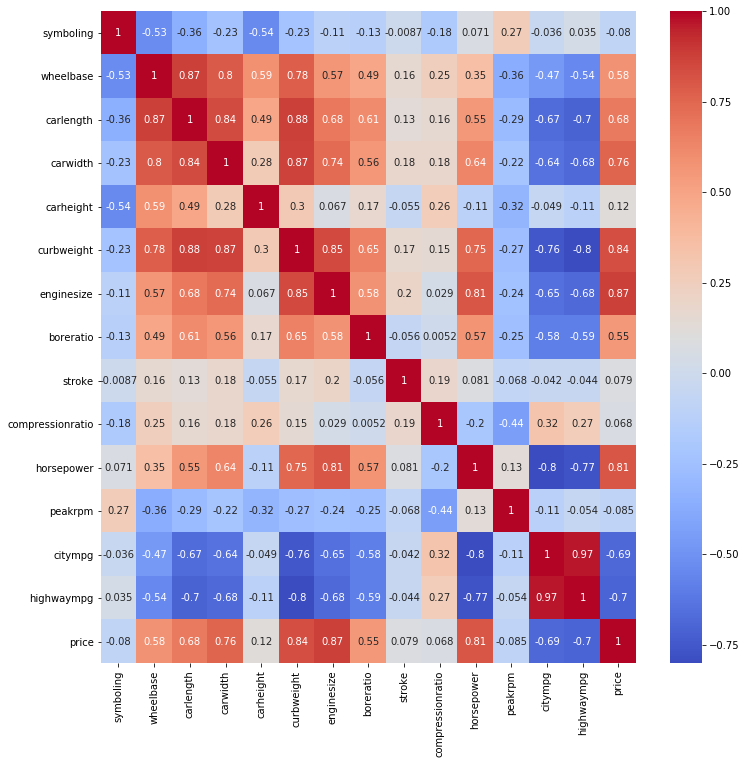

In [28]:
#heatmap representation of numerical columns in a dataset
fig,axes = plt.subplots(figsize = (12,12))
sns.heatmap(ds.corr(),annot=True,cmap='coolwarm')

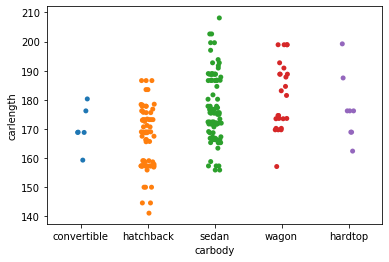

In [29]:
#car body vs carlength plot
sns.stripplot(data=ds,x='carbody',y='carlength',jitter=True)

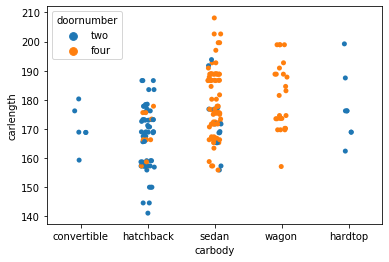

In [30]:
#car body vs carlength plot with door number
sns.stripplot(data=ds,x='carbody',y='carlength',jitter=True,hue='doornumber')

In [31]:
#Checking for missing value in dataset
ds.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [32]:
#Splitting data into regressor and response
x = ds.iloc[:,:-1].values
y = ds.iloc[:,-1].values

In [33]:
x[1]

array([3, 'gas', 'std', 'two', 'convertible', 'rwd', 'front', 88.6, 168.8,
       64.1, 48.8, 2548, 'dohc', 'four', 130, 'mpfi', 3.47, 2.68, 9.0,
       111, 5000, 21, 27], dtype=object)

#### Encoding Categorical data

In [34]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1,2,3,4,5,6,12,13,15])],remainder='passthrough')
x=ct.fit_transform(x)

In [35]:
print(x.shape)
print(y.shape)

(205, 52)
(205,)


In [36]:
x[39]

array([0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0,
       96.5, 175.4, 65.2, 54.1, 2304, 110, 3.15, 3.58, 9.0, 86, 5800, 27,
       33], dtype=object)

#### Training Test Split

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [38]:
print('The shape of X_train is',x_train.shape)
print('The shape of y_train is',y_train.shape)
print('The shape of X_test is',x_test.shape)
print('The shape of y_test is',y_test.shape)

The shape of X_train is (164, 52)
The shape of y_train is (164,)
The shape of X_test is (41, 52)
The shape of y_test is (41,)


#### Scaling data

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,39:]=sc.fit_transform(x_train[:,39:])
x_test[:,39:]=sc.transform(x_test[:,39:])

In [40]:
x_train[1]

array([1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1,
       -0.7354731383754939, -0.8223446402077668, -1.0544190744929447,
       0.29219446131623955, -1.097875453460066, -0.6097949117436268,
       -1.3119321240683242, 0.7760872595934016, 2.975423963274685,
       -1.2526749139942206, -0.6493626970078091, 3.0993995725086165,
       2.894688354216746], dtype=object)

In [41]:
x_test[1]

array([0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0,
       0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
       0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1,
       -0.7354731383754939, -0.4080273029845915, -1.0544190744929447,
       -0.10948107645294576, -1.0590938017557883, -0.7511133745688102,
       -0.7092518205747531, 0.18660839935418583, -0.19077507575666003,
       -0.9093370122954345, 0.2026011614664361, 0.94166111936132,
       0.9786760688426068], dtype=object)

<font size='4'><b>3. Decision Tree Regression Model Building</b></font>

#### Building a Decision Tree Regression model

In [42]:
from sklearn import tree
pred = tree.DecisionTreeRegressor()

#### Training the model on training set

In [43]:
pred.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Preditcing on test set

In [44]:
y_pred = pred.predict(x_test)

In [45]:
print(y_pred)

[ 6189.   7349.   6918.   8916.5  8845.  28176.   7499.   5399.   5348.
  8495.  11900.  15985.  15985.   7895.  12629.  12170.   8238.   5195.
 19699.  11245.  10898.   6377.  16430.   7689.  11549.   5195.  14869.
  7738.   6229.   7099.   7975.   8921.  30760.  18344.  16900.   7738.
  7895.  35550.  13645.  22470.   7799. ]


In [46]:
pd.DataFrame(zip(y_test,y_pred), columns=['Actual_Y','Predicted_Y'])

,Actual_Y,Predicted_Y
0,6669.0,6189.0
1,7999.0,7349.0
2,6338.0,6918.0
3,8916.5,8916.5
4,10295.0,8845.0
5,25552.0,28176.0
6,8249.0,7499.0
7,5151.0,5399.0
8,6488.0,5348.0
9,10245.0,8495.0


<font size='4'><b>4. Random Forest Model Buinding</b></font>

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [48]:
y_pred_rf = reg_rf.predict(x_test)

In [49]:
pd.DataFrame(zip(y_test,y_pred_rf), columns=['Actual_Y','Predicted_Y'])

,Actual_Y,Predicted_Y
0,6669.0,6740.270833
1,7999.0,7377.790000
2,6338.0,6817.528333
3,8916.5,6457.470000
4,10295.0,9089.920000
5,25552.0,29590.970000
6,8249.0,7316.000000
7,5151.0,6035.935000
8,6488.0,6775.032500
9,10245.0,9225.251667


<font size='4'><b>5.Model Evaluation </b></font>

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

#### Decision tree-Model Evaluation

In [52]:
r2 = r2_score(y_test,y_pred)
mn_abs = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r_mse = (mse)**0.5

print('The r2 score is',r2)
print('The mean absolute error is',mn_abs)
print('The mean squared error', mse)
print('The root mean square error is',r_mse)

The r2 score is 0.8729204978987061
The mean absolute error is 1504.1951219512196
The mean squared error 6983085.658536585
The root mean square error is 2642.552867689989


#### Random forest model evaluation

In [53]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2_rf = r2_score(y_test,y_pred_rf)
mn_abs_rf = mean_absolute_error(y_test,y_pred_rf)
mse_rf = mean_squared_error(y_test,y_pred_rf)
r_mse_rf = (mse_rf)**0.5

print('The r2 score is',r2_rf)
print('The mean absolute error is',mn_abs_rf)
print('The mean squared error is', mse_rf)
print('The root mean square error is',r_mse_rf)

The r2 score is 0.9040277523438097
The mean absolute error is 1529.8287472357722
The mean squared error is 5273725.621707802
The root mean square error is 2296.45936643952


<font size='4'><b>6.Compare the performance of decision tree regression and random forest regression models </b></font>

In [54]:
comp = [['r2_Score',round(r2,2),round(r2_rf,2)],
       ['Mean_absolute_error',round(mn_abs,2),round(mn_abs_rf,2)],
       ['Mean squared error',round(mse,2),round(mse_rf,2)],
       ['Root MSE',round(r_mse,2),round(r_mse_rf,2)]]

In [55]:
pd.DataFrame(comp,columns=['metrics','Decision_Tree','Random_Forest'])

,metrics,Decision_Tree,Random_Forest
0,r2_Score,0.87,0.90
1,Mean_absolute_error,1504.20,1529.83
2,Mean squared error,6983085.66,5273725.62
3,Root MSE,2642.55,2296.46


By building and comparing the models-Decision Tree and Random Forest, it is found that Random Forest is the best model. 
Random Forest has the better accuracy of 0.91 than Decision Tree and it has lesser error values than Decision tree.